<h1> Exercise n°1 from Lecture 3

control if the sequence is correct:

<div style="text-align: center;">
<img src="es1.png" width=>
</div>

## Theoric test:

* $\ket{00} \rarr^{I \otimes I} \ket{00} \rarr^{H \otimes I} \frac{\ket{0}+\ket{1}}{\sqrt{2}} \otimes \ket{0} = \frac{\ket{00}+\ket{10}}{\sqrt{2}} \rarr^{CNOT} \frac{\ket{00}+\ket{11}}{\sqrt{2}}$


* $\ket{00} \rarr^{I \otimes X} \ket{01} \rarr^{H \otimes I} \frac{\ket{0}+\ket{1}}{\sqrt{2}} \otimes \ket{1} = \frac{\ket{01}+\ket{11}}{\sqrt{2}} \rarr^{CNOT} \frac{\ket{01}+\ket{10}}{\sqrt{2}}$


* $\ket{00} \rarr^{Z \otimes I} \ket{00} \rarr^{H \otimes I} \frac{\ket{0}+\ket{1}}{\sqrt{2}} \otimes \ket{0} = \frac{\ket{00}+\ket{10}}{\sqrt{2}} \rarr^{CNOT} \frac{\ket{00}+\ket{11}}{\sqrt{2}}$

* $\ket{00} \rarr^{I \otimes X} \ket{01} \rarr^{Z \otimes I} \ket{01} \rarr^{H \otimes I} \frac{\ket{0}+\ket{1}}{\sqrt{2}} \otimes \ket{1} = \frac{\ket{01}+\ket{11}}{\sqrt{2}} \rarr^{CNOT} \frac{\ket{01}+\ket{10}}{\sqrt{2}}$


## Coding Test:

Import the necessary libraries

In [1]:
from qiskit import __version__
assert __version__ == '2.0.0', "Qiskit version must be 2.0.0"

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

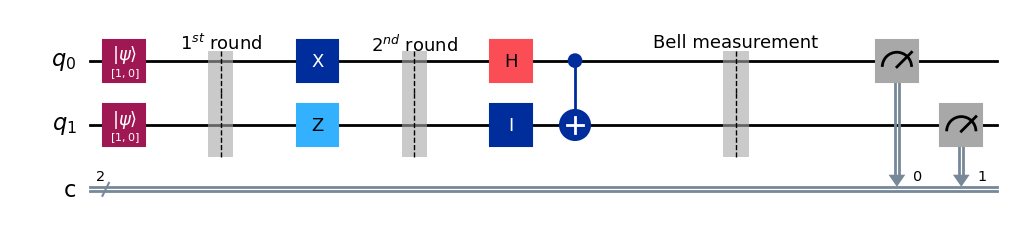

In [14]:
def build_circuit(a:int, b:int) -> QuantumCircuit:
    qr = QuantumRegister(2, name='q')
    cr = ClassicalRegister(2, name='c')
    qc = QuantumCircuit(qr, cr)

    init = [1, 0]
    qc.initialize(init, 0)
    qc.initialize(init, 1)

    qc.barrier(label='$1^{st}$ round')

    if a == 1:
        qc.x(0)
    else:
        qc.id(0)
    
    if b == 1:
        qc.z(1)
    else:
        qc.id(1)
    
    qc.barrier(label='$2^{nd}$ round')

    qc.h(0)
    qc.id(1)
    qc.cx(0, 1)


    qc.barrier(label='Bell measurement')


    qc.measure(0, 0)
    qc.measure(1, 1)

    return qc

build_circuit(1, 1).draw(output='mpl')

In [10]:
from qiskit_aer import AerSimulator

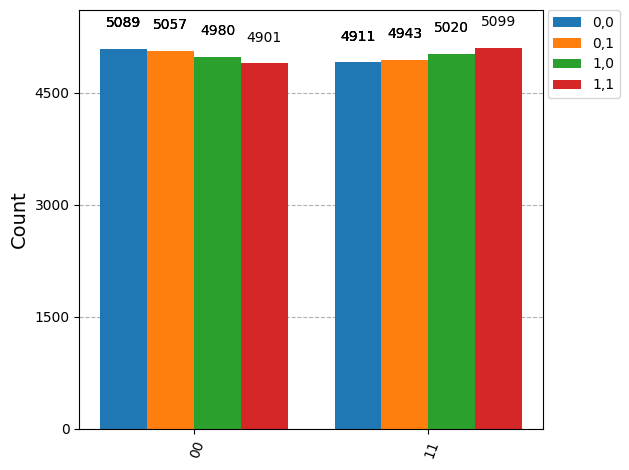

In [15]:
sequences = [(a, b) for a in [0, 1] for b in [0, 1]]
counts = []

for a, b in sequences:
    qc = build_circuit(a, b)
    sim = AerSimulator(method='statevector')
    result = sim.run(qc, shots=10000).result()
    counts.append(result.get_counts())

plot_histogram(counts, legend=[f'{a},{b}' for a, b in sequences])

### Conclusions:
The algorithm seems not to be working!

The output is constantly a bell state $\ket{00} \pm \ket{11} $

## Inversion of the circuit order

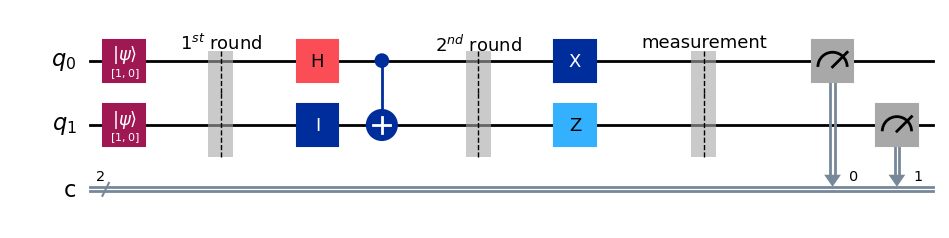

In [17]:
def build_circuit(a:int, b:int) -> QuantumCircuit:
    qr = QuantumRegister(2, name='q')
    cr = ClassicalRegister(2, name='c')
    qc = QuantumCircuit(qr, cr)

    init = [1, 0]
    qc.initialize(init, 0)
    qc.initialize(init, 1)

    
    qc.barrier(label='$1^{st}$ round')

    qc.h(0)
    qc.id(1)
    qc.cx(0, 1)

    qc.barrier(label='$2^{nd}$ round')

    if a == 1:
        qc.x(0)
    else:
        qc.id(0)
    
    if b == 1:
        qc.z(1)
    else:
        qc.id(1)

    qc.barrier(label='measurement')

    qc.measure(0, 0)
    qc.measure(1, 1)

    return qc

build_circuit(1, 1).draw(output='mpl')

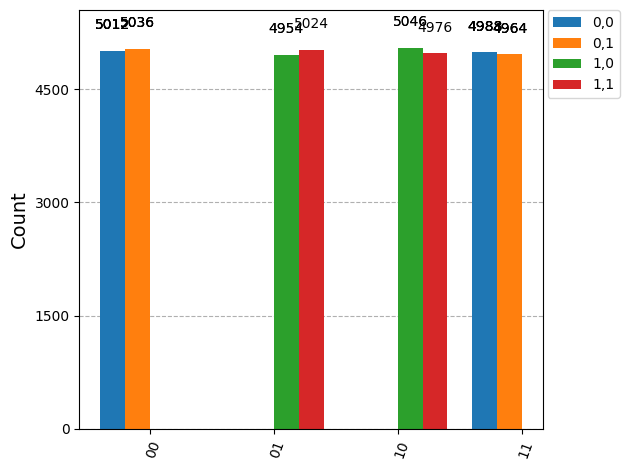

In [18]:
sequences = [(a, b) for a in [0, 1] for b in [0, 1]]
counts = []

for a, b in sequences:
    qc = build_circuit(a, b)

    sim = AerSimulator()
    result = sim.run(qc, shots=10000).result()
    counts.append(result.get_counts())

plot_histogram(counts, legend=[f'{a},{b}' for a, b in sequences])

### Conclusion:
The solution is correct!
The inputs map to all the bell states:

Note that we can't distinguish between two bell states that differ only by a phase